In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

Matplotlib is building the font cache; this may take a moment.


In [2]:
simd=pd.read_csv('../data/combined_dataset_cleaned.csv')

In [3]:
simd.head()

,Unnamed: 0,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,...,PT_GP,PT_Post,PT_retail,crime_count,crime_rate,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate,year
0,0,S01006506,Culter,Aberdeen City,904.0,605.0,0.07,60.0,0.07,40.0,...,8.437832,5.987087,5.711433,8.00642939150402,88.5666968086728,87.0,10.0,0.102113,0.011737,2016
1,1,S01006507,Culter,Aberdeen City,830.0,491.0,0.07,60.0,0.05,25.0,...,8.331833,7.262817,6.794300,4.00321469575201,48.2315023584579,85.0,4.0,0.101675,0.004785,2016
2,2,S01006508,Culter,Aberdeen City,694.0,519.0,0.05,30.0,0.03,15.0,...,7.853631,5.827924,5.251454,4.00321469575201,57.6832088725073,31.0,8.0,0.048212,0.012442,2016
3,3,S01006509,Culter,Aberdeen City,573.0,354.0,0.05,30.0,0.06,20.0,...,7.434491,8.311862,8.444698,*,*,42.0,6.0,0.072414,0.010345,2016
4,4,S01006510,Culter,Aberdeen City,676.0,414.0,0.10,70.0,0.07,30.0,...,5.141013,6.627376,6.619130,12.009644087256,177.657456912071,50.0,7.0,0.086655,0.012132,2016


In [4]:
simd.isnull().sum()

Unnamed: 0                        0
Data_Zone                         0
Intermediate_Zone                 0
Council_area                      0
Total_population                  0
Working_age_population_revised    0
Income_rate                       2
Income_count                      0
Employment_rate                   2
Employment_count                  0
CIF                               0
ALCOHOL                           0
DRUG                              0
SMR                               0
DEPRESS                           0
LBWT                              0
EMERG                             0
Attendance                        2
Attainment                        1
Noquals                           0
NEET                              3
HESA                              0
drive_petrol                      0
drive_GP                          0
drive_PO                          0
drive_primary                     0
drive_retail                      0
drive_secondary             

In [5]:
simd.columns

Index(['Unnamed: 0', 'Data_Zone', 'Intermediate_Zone', 'Council_area',
       'Total_population', 'Working_age_population_revised', 'Income_rate',
       'Income_count', 'Employment_rate', 'Employment_count', 'CIF', 'ALCOHOL',
       'DRUG', 'SMR', 'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment',
       'Noquals', 'NEET', 'HESA', 'drive_petrol', 'drive_GP', 'drive_PO',
       'drive_primary', 'drive_retail', 'drive_secondary', 'PT_GP', 'PT_Post',
       'PT_retail', 'crime_count', 'crime_rate', 'overcrowded_count',
       'nocentralheat_count', 'overcrowded_rate', 'nocentralheat_rate',
       'year'],
      dtype='object')

In [6]:
numeric_columns = simd.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns

['Unnamed: 0',
 'Total_population',
 'Working_age_population_revised',
 'Income_rate',
 'Income_count',
 'Employment_rate',
 'Employment_count',
 'ALCOHOL',
 'DRUG',
 'SMR',
 'EMERG',
 'Noquals',
 'NEET',
 'drive_petrol',
 'drive_GP',
 'drive_PO',
 'drive_primary',
 'drive_retail',
 'drive_secondary',
 'PT_GP',
 'PT_Post',
 'PT_retail',
 'overcrowded_count',
 'nocentralheat_count',
 'overcrowded_rate',
 'nocentralheat_rate',
 'year']

In [7]:
simd[numeric_columns].describe()

,Unnamed: 0,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,ALCOHOL,DRUG,SMR,...,drive_retail,drive_secondary,PT_GP,PT_Post,PT_retail,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate,year
count,8042.000000,8042.000000,8042.000000,8040.000000,8042.000000,8040.000000,8042.000000,8042.000000,8042.000000,8042.000000,...,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000
mean,4020.500000,773.620617,500.776424,0.121623,92.655558,0.105061,51.381870,99.330153,95.947311,98.990301,...,5.081690,5.945417,10.046098,8.469875,13.102799,83.870057,13.766600,0.111320,0.018261,2016.530216
std,2321.669765,200.509331,163.736946,0.095424,75.261552,0.079730,41.238569,99.790209,147.090533,45.677567,...,5.765077,4.896820,5.942590,4.386443,10.127055,65.128254,17.783708,0.079961,0.022527,1.356453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.685475,1.017791,1.601271,1.930570,1.835432,0.000000,0.000000,0.000000,0.000000,2016.000000
25%,2010.250000,638.000000,400.000000,0.050000,35.000000,0.040000,20.000000,32.799203,0.000000,70.000000,...,2.777500,3.628994,6.267574,5.568977,7.823843,36.000000,3.000000,0.050000,0.004283,2016.000000
50%,4020.500000,758.000000,479.000000,0.100000,70.000000,0.080000,40.000000,70.165935,43.320199,92.000000,...,3.946242,4.776938,8.665514,7.465039,10.969180,68.000000,8.000000,0.093750,0.010345,2016.000000
75%,6030.750000,884.000000,569.000000,0.180000,130.000000,0.150000,70.000000,133.146010,129.245471,120.000000,...,5.730346,6.531299,12.007307,10.139799,15.499208,114.000000,17.000000,0.152297,0.023510,2016.000000
max,8041.000000,3847.000000,3423.000000,0.730000,555.000000,0.530000,325.000000,2350.544008,1864.126199,950.000000,...,190.000000,116.149193,108.789987,40.277934,190.000000,490.000000,187.000000,0.583882,0.214964,2020.000000


In [8]:
correlation_matrix = simd[numeric_columns].corr()
correlation=correlation_matrix[correlation_matrix > 0.5].fillna(0)
correlation


,Unnamed: 0,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,ALCOHOL,DRUG,SMR,...,drive_retail,drive_secondary,PT_GP,PT_Post,PT_retail,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate,year
Unnamed: 0,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.587325
Total_population,0.000000,1.00000,0.91505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Working_age_population_revised,0.000000,0.91505,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Income_rate,0.000000,0.00000,0.00000,1.000000,0.937342,0.960425,0.887816,0.662814,0.602498,0.539333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.533016,0.000000,0.580562,0.000000,0.000000
Income_count,0.000000,0.00000,0.00000,0.937342,1.000000,0.894768,0.951849,0.638888,0.573193,0.523268,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.623356,0.000000,0.579494,0.000000,0.000000
Employment_rate,0.000000,0.00000,0.00000,0.960425,0.894768,1.000000,0.917073,0.684009,0.623805,0.526053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.546828,0.000000,0.000000
Employment_count,0.000000,0.00000,0.00000,0.887816,0.951849,0.917073,1.000000,0.672955,0.599873,0.517058,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.645925,0.000000,0.602425,0.000000,0.000000
ALCOHOL,0.000000,0.00000,0.00000,0.662814,0.638888,0.684009,0.672955,1.000000,0.564774,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DRUG,0.000000,0.00000,0.00000,0.602498,0.573193,0.623805,0.599873,0.564774,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SMR,0.000000,0.00000,0.00000,0.539333,0.523268,0.526053,0.517058,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
final_dict={numeric_columns[i]+" "+numeric_columns[j]:correlation_matrix.iloc[i,j] for j in range(0,correlation_matrix.shape[1]) for i in range(0,correlation_matrix.shape[0]) if(correlation_matrix.iloc[i,j]>0.5 and correlation_matrix.iloc[i,j]!=1) }

In [10]:
for i,j in final_dict.items():
    print(i)
    print(j)
    print("***********")

year Unnamed: 0
0.5873248822074465
***********
Working_age_population_revised Total_population
0.9150502661038414
***********
Total_population Working_age_population_revised
0.9150502661038414
***********
Income_count Income_rate
0.9373415803320199
***********
Employment_rate Income_rate
0.9604246140056043
***********
Employment_count Income_rate
0.887815947474351
***********
ALCOHOL Income_rate
0.6628144873054533
***********
DRUG Income_rate
0.6024982079896563
***********
SMR Income_rate
0.5393327275902097
***********
EMERG Income_rate
0.8271858396158407
***********
Noquals Income_rate
0.8762713470112445
***********
NEET Income_rate
0.6825590038366052
***********
overcrowded_count Income_rate
0.5330158709627201
***********
overcrowded_rate Income_rate
0.5805616681960838
***********
Income_rate Income_count
0.9373415803320199
***********
Employment_rate Income_count
0.8947681018647816
***********
Employment_count Income_count
0.9518493692722477
***********
ALCOHOL Income_count
0.638888

In [11]:
for i,j in final_dict.items():
    if('Employment_count' in i):
        print(i)
        print(j)
        print("***********")

Employment_count Income_rate
0.887815947474351
***********
Employment_count Income_count
0.9518493692722477
***********
Employment_count Employment_rate
0.9170730384698288
***********
Income_rate Employment_count
0.887815947474351
***********
Income_count Employment_count
0.9518493692722477
***********
Employment_rate Employment_count
0.9170730384698288
***********
ALCOHOL Employment_count
0.672955003903953
***********
DRUG Employment_count
0.5998725638904423
***********
SMR Employment_count
0.5170577167227455
***********
EMERG Employment_count
0.7606247542539755
***********
Noquals Employment_count
0.7788434307803658
***********
NEET Employment_count
0.6417568116347189
***********
overcrowded_count Employment_count
0.6459250880939955
***********
overcrowded_rate Employment_count
0.602425266084049
***********
Employment_count ALCOHOL
0.672955003903953
***********
Employment_count DRUG
0.5998725638904423
***********
Employment_count SMR
0.5170577167227455
***********
Employment_count EM

In [12]:
sorted(simd['Employment_count'].unique())
#0-110,120-230,240-340

[0.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 110.0,
 111.0,
 112.0,
 113.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 130.0,
 131.0,
 135.0,
 137.0,
 138.0,
 140.0,
 143.0,
 144.0,
 145.0,
 149.0,
 150.0,
 155.0,
 160.0,
 165.0,
 170.0,
 17

In [13]:
trial=simd.copy()
trial['Employment_count']=trial['Employment_count'].apply(lambda x: 0 if (x >= 0 and x <= 50) else 1 if (x >= 51 and x <= 120) else 2 if x > 120 else None)

In [14]:
trial['Employment_count'].value_counts()

Employment_count
0    4923
1    2574
2     545
Name: count, dtype: int64

In [15]:
trial.drop('Unnamed: 0',axis=1,inplace=True)

#### BASE MODEL (With All features)

In [16]:
X = trial.drop('Employment_count', axis=1)
y = trial['Employment_count']

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=101)
X_validation,X_test,y_validation,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=20)


In [18]:
encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == 'object' :
        X_train[column] = encoder.fit_transform(X_train[column])
    if X_test[column].dtype=='object':
        X_test[column] = encoder.fit_transform(X_test[column])
    if X_validation[column].dtype == 'object':
        X_validation[column] = encoder.fit_transform(X_validation[column])


In [19]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred=model.predict(X_test)

In [21]:
report=classification_report(y_pred,y_test,output_dict=True)
report_df=pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.973948,0.969093,0.971514,1003.00000
1,0.925926,0.918762,0.922330,517.00000
2,0.836735,0.921348,0.877005,89.00000
accuracy,0.950280,0.950280,0.950280,0.95028
macro avg,0.912203,0.936401,0.923617,1609.00000
weighted avg,0.950928,0.950280,0.950483,1609.00000


In [22]:
SSE=np.mean((np.mean(y_pred)-y_test)**2)
variance=np.var(y_pred)
bias=SSE-variance
print("BIAS ERROR: ",bias)
print("VARIANCE ERROR: ",variance)

BIAS ERROR:  0.012371368170263464
VARIANCE ERROR:  0.3559962779285723


### We have low bias and high variance, which shows our model is overfitting.

<Axes: >

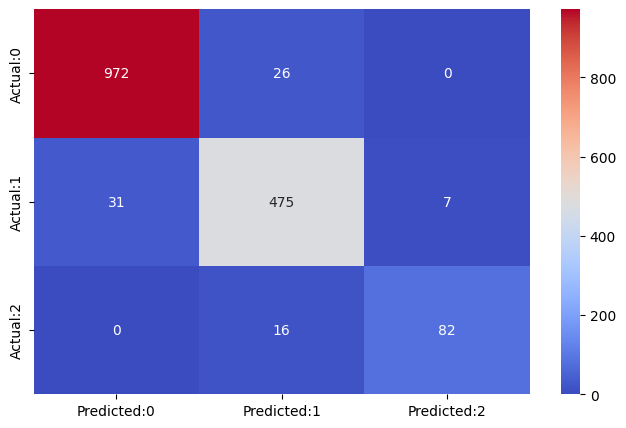

In [23]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")

FOR CLASS 0

In [24]:
TP=cm[0,0]
FN=cm[0,1]+cm[0,2]
FP=cm[1,0]+cm[2,0]
TN=cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9739478957915831 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9492635024549918 

 Positive Predictive value = TP / (TP+FP) =  0.9690927218344965 

 Negative predictive Value = TN / (TN+FN) =  0.9570957095709571 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  19.19619884931152 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.02744454426093569


FOR CLASS 1

In [25]:
TP=cm[1,1]
FN=cm[1,0]+cm[1,2]
FP=cm[0,1]+cm[2,1]
TN=cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9259259259259259 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9616788321167883 

 Positive Predictive value = TP / (TP+FP) =  0.9187620889748549 

 Negative predictive Value = TN / (TN+FN) =  0.9652014652014652 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  24.162257495590804 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.07702579239581137


FOR CLASS 2

In [26]:
TP=cm[2,2]
FN=cm[2,0]+cm[2,1]
FP=cm[0,2]+cm[1,2]
TN=cm[0,0]+cm[1,1]+cm[1,0]+cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print('Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8367346938775511 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9953673064195897 

 Positive Predictive value = TP / (TP+FP) =  0.9213483146067416 

 Negative predictive Value = TN / (TN+FN) =  0.9894736842105263 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  180.61516034985533 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.16402518454190182


In [27]:
X_train.shape

(4825, 36)

### FEATURE SELECTION 

### Let use RFE(Recursive Feature Elimination) where we give a threshold on the number of top features to select for our Machine Learning Model

In [28]:
estimator = DecisionTreeClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=15, step=1)
selector = selector.fit(X_train.fillna(0), y_train)
features_rank = pd.DataFrame({'Feature':X_train.columns,'Rank':selector.ranking_})
features_rank.sort_values(by='Rank')

,Feature,Rank
0,Data_Zone,1
34,nocentralheat_rate,1
25,drive_secondary,1
26,PT_GP,1
30,crime_rate,1
10,DRUG,1
18,NEET,1
8,CIF,1
9,ALCOHOL,1
6,Income_count,1


In [29]:
X_train=X_train[list(features_rank[features_rank['Rank']==1]['Feature'].values)]
X_test=X_test[list(features_rank[features_rank['Rank']==1]['Feature'].values)]

In [46]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred=model.predict(X_test)

In [48]:
report=classification_report(y_pred,y_test,output_dict=True)
report_df=pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.979960,0.974104,0.977023,1004.000000
1,0.923977,0.938614,0.931238,505.000000
2,0.887755,0.870000,0.878788,100.000000
accuracy,0.956495,0.956495,0.956495,0.956495
macro avg,0.930564,0.927572,0.929016,1609.000000
weighted avg,0.956658,0.956495,0.956547,1609.000000


<Axes: >

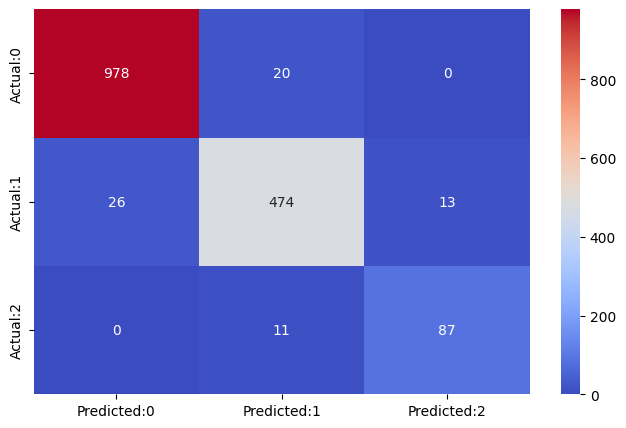

In [49]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")

In [50]:
SSE=np.mean((np.mean(y_pred)-y_test)**2)
variance=np.var(y_pred)
bias=SSE-variance
print("BIAS ERROR: ",bias)
print("VARIANCE ERROR: ",variance)

BIAS ERROR:  -0.002178547411024301
VARIANCE ERROR:  0.3704766654009976


### Our bias error is low and variance is high, which is typical for Decision Tree Models, being prone to overfitting. Considering the bias-variance trade-off, we can try to reduce the variance and slightly increase the bias

### Let us use pruning, a  technique to help resolve overfitting

In [57]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [62]:
params = {'max_depth': [2,4,6,8,10,12,14,16,18,20],
         'min_samples_split': [2,3,4,5,6,7],
         'min_samples_leaf': [1,2,3,4,5]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [63]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [64]:
SSE=np.mean((np.mean(y_test_pred-y_test)**2))
variance=np.var(y_test_pred)
bias=SSE-variance
print("BIAS ERROR: ",bias)
print("VARIANCE ERROR: ",variance)

BIAS ERROR:  -0.3679037391058144
VARIANCE ERROR:  0.36791339578760085


In [61]:
report=classification_report(y_test_pred,y_test,output_dict=True)
report_df=pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.978958,0.976024,0.977489,1001.000000
1,0.927875,0.927875,0.927875,513.000000
2,0.836735,0.863158,0.849741,95.000000
accuracy,0.954009,0.954009,0.954009,0.954009
macro avg,0.914523,0.922352,0.918368,1609.000000
weighted avg,0.954274,0.954009,0.954128,1609.000000


<Axes: >

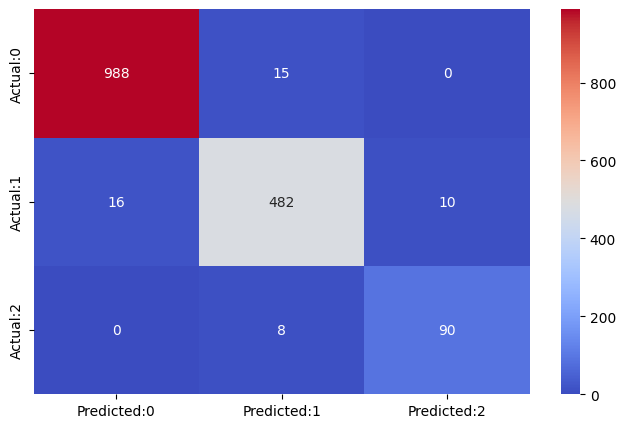

In [65]:
cm = confusion_matrix(y_test_pred, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")

### UNSEEN DATA

In [66]:
X_validation=X_validation[list(features_rank[features_rank['Rank']==1]['Feature'].values)]
y_predict=model.predict(X_validation)

In [67]:
report=classification_report(y_predict,y_validation,output_dict=True)
report_df=pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.964250,0.979818,0.971972,991.000000
1,0.939834,0.897030,0.917933,505.000000
2,0.865546,0.919643,0.891775,112.000000
accuracy,0.949627,0.949627,0.949627,0.949627
macro avg,0.923210,0.932164,0.927227,1608.000000
weighted avg,0.949707,0.949627,0.949415,1608.000000


<Axes: >

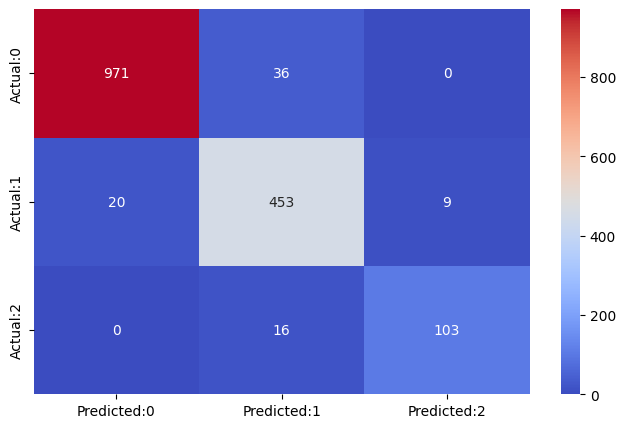

In [73]:
cm = confusion_matrix(y_validation, y_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")